# neural network on top 50 most important features per recursive feature elimination package

In [ ]:
from keras.models import model_from_json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn as sk
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import *
from keras import callbacks
from keras.utils.np_utils import *

print("Done Loading")


Done Loading


In [ ]:
full_df = pd.read_csv("https://raw.githubusercontent.com/jwaldroop/phishing-url-project/main/dataset_full.csv")

full_df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,...,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,...,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,...,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,...,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,...,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410021,0,20454,-1,-1,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0,0


In [ ]:
len(full_df[full_df.phishing == 1])

30647

In [ ]:
len(full_df[full_df.phishing != 1])

58000

# neural network model on entire dataset

In [ ]:
y = full_df.iloc[:,-1]

features = ['qty_dot_url', 'qty_hyphen_url', 'qty_slash_url', 'length_url',
       'qty_dot_domain', 'qty_vowels_domain', 'domain_length',
       'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory',
       'qty_slash_directory', 'qty_at_directory', 'qty_and_directory',
       'qty_space_directory', 'qty_tilde_directory', 'qty_comma_directory',
       'qty_plus_directory', 'qty_asterisk_directory', 'qty_hashtag_directory',
       'qty_dollar_directory', 'directory_length', 'qty_dot_file',
       'qty_hyphen_file', 'qty_underline_file', 'qty_slash_file',
       'qty_questionmark_file', 'qty_equal_file', 'qty_at_file',
       'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file',
       'qty_percent_file', 'file_length', 'params_length', 'time_response',
       'asn_ip', 'time_domain_activation', 'time_domain_expiration',
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects']
X = full_df[features]

X = tf.keras.utils.normalize(X, axis=-1, order=2)

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.25, random_state=808)

train_X.head()

,qty_dot_url,qty_hyphen_url,qty_slash_url,length_url,qty_dot_domain,qty_vowels_domain,domain_length,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_at_directory,qty_and_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,params_length,time_response,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects
5676,0.000004,0.0,0.000004,0.000042,0.000004,0.000008,0.000038,0.000000,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000004,0.000033,0.999934,0.000591,0.000797,0.000004,0.000023,0.000008,0.011480,0.000004,0.000000
39002,0.000777,0.0,0.000000,0.003369,0.000777,0.000518,0.003369,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,-0.000259,0.000063,0.730209,-0.000259,0.680198,0.001036,0.001036,0.000518,0.064003,0.000259,0.000259
1732,0.000092,0.0,0.000000,0.000737,0.000092,0.000230,0.000737,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,-0.000046,0.000020,0.698307,0.269674,0.016112,0.000046,0.000092,0.000046,0.662860,0.000000,0.000000
39668,0.000122,0.0,0.000000,0.001588,0.000122,0.000550,0.001588,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,-0.000061,0.000038,0.859057,0.261792,0.005926,0.000061,0.000122,0.000244,0.439823,0.000000,0.000061
82035,0.000054,0.0,0.000000,0.000751,0.000054,0.000188,0.000751,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,-0.000027,0.000004,0.795440,0.178787,0.007212,0.000027,0.000107,0.000107,0.579014,0.000000,0.000000


In [ ]:
tf.keras.backend.clear_session()

#neural net

top_50_nn = keras.Sequential([
                          layers.InputLayer(input_shape=[50]),
                          layers.Dense(units=64, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=64, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=50, activation='relu'),
                          layers.Dropout(0.20),
                          layers.Dense(units=32, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=32, activation='relu'),
                          layers.Dropout(0.2),
                          layers.Dense(units=16, activation='relu'),
                          layers.Dropout(0.40),
                          layers.Dense(units=16, activation='relu'),
                          layers.Dropout(0.40),
                          layers.Dense(units=111, activation='relu'),
                          layers.Flatten(),
                          layers.Dense(units=1, activation='sigmoid')
])

top_50_nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.5), 
             tf.keras.metrics.AUC(),
             ]
)

earlystopping = callbacks.EarlyStopping(monitor = 'val_binary_accuracy', mode = 'max',
                                       patience = 25, restore_best_weights = True)


top_50_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3264      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3250      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1

In [ ]:
history1 = top_50_nn.fit(train_X, train_y, validation_split=0.30, batch_size= 15, epochs=500, callbacks = [earlystopping])

Epoch 1/500
3103/3103 [==============================] - 12s 3ms/step - loss: 0.5855 - binary_accuracy: 0.6744 - auc: 0.7033 - val_loss: 0.5368 - val_binary_accuracy: 0.7284 - val_auc: 0.7735
Epoch 2/500
3103/3103 [==============================] - 9s 3ms/step - loss: 0.5287 - binary_accuracy: 0.7298 - auc: 0.7769 - val_loss: 0.3884 - val_binary_accuracy: 0.8606 - val_auc: 0.9254
Epoch 3/500
3103/3103 [==============================] - 9s 3ms/step - loss: 0.4065 - binary_accuracy: 0.8327 - auc: 0.8889 - val_loss: 0.3187 - val_binary_accuracy: 0.9010 - val_auc: 0.9548
Epoch 4/500
3103/3103 [==============================] - 9s 3ms/step - loss: 0.3415 - binary_accuracy: 0.8598 - auc: 0.9215 - val_loss: 0.2761 - val_binary_accuracy: 0.9131 - val_auc: 0.9623
Epoch 5/500
3103/3103 [==============================] - 10s 3ms/step - loss: 0.3098 - binary_accuracy: 0.8722 - auc: 0.9336 - val_loss: 0.2682 - val_binary_accuracy: 0.8918 - val_auc: 0.9613
Epoch 6/500
3103/3103 [====================

In [ ]:
history_df1 = pd.DataFrame(history1.history)

history_df1.describe()

,loss,binary_accuracy,auc,val_loss,val_binary_accuracy,val_auc
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,0.265422,0.892853,0.947569,0.255836,0.902354,0.960691
std,0.048991,0.029792,0.029846,0.045601,0.024464,0.022182
min,0.240446,0.695761,0.741526,0.213778,0.728417,0.773464
25%,0.247220,0.895018,0.950988,0.231365,0.895618,0.962333
50%,0.252050,0.900524,0.954141,0.242647,0.908478,0.964513
75%,0.263375,0.902904,0.955986,0.267447,0.915672,0.965714
max,0.563009,0.905928,0.958529,0.536762,0.921087,0.967174


In [ ]:
train_acc = top_50_nn.evaluate(train_X, train_y)
test_acc = top_50_nn.evaluate(val_X, val_y)

693/693 [==============================] - 1s 1ms/step - loss: 0.2206 - binary_accuracy: 0.9209 - auc: 0.9653


In [ ]:
dict(zip(top_50_nn.metrics_names, test_acc))

{'auc': 0.9653361439704895,
 'binary_accuracy': 0.9209006428718567,
 'loss': 0.22059671580791473}

Minimum validation loss (binary_crossentropy): 0.21377812325954437


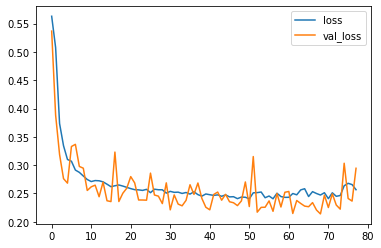

In [ ]:
history_df1.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss (binary_crossentropy): {}".format(history_df1['val_loss'].min()))

Maximum AUC: 0.9671738743782043


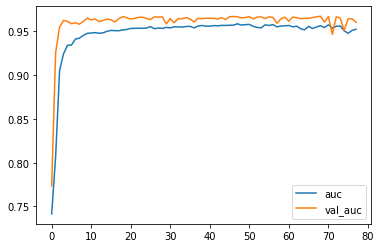

In [ ]:
history_df1.loc[:, ['auc', 'val_auc']].plot();
print("Maximum AUC: {}".format(history_df1['val_auc'].max()))

Maximum validation binary accuracy: 0.9210869073867798


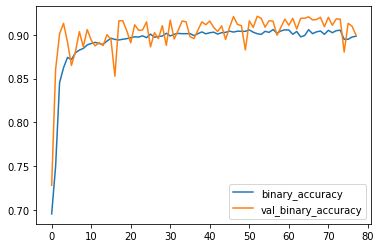

In [ ]:
history_df1.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();
print("Maximum validation binary accuracy: {}".format(history_df1['val_binary_accuracy'].max()))

In [ ]:
history_df1.binary_accuracy.max() - history_df1.val_binary_accuracy.max()

-0.015158534049987793

In [ ]:
preds1 = top_50_nn.predict(val_X)
preds1

array([[0.92298114],
       [0.01311919],
       [0.40806997],
       ...,
       [0.10505545],
       [0.02843496],
       [0.92298114]], dtype=float32)

In [ ]:
len(preds1[preds1 <= 0.5])

13792

In [ ]:
len(preds1[preds1 > 0.5])

8370

In [ ]:
len(val_y)

22162

In [ ]:
preds_df = pd.DataFrame(preds1, columns = ['preds'])

preds_df.head()

,preds
0,0.922981
1,0.013119
2,0.408070
3,0.036358
4,0.922981


In [ ]:
preds_df = pd.concat([preds_df, val_y.reset_index(drop=True), val_X.reset_index()], axis=1)

preds_df

,preds,phishing,index,qty_dot_url,qty_hyphen_url,qty_slash_url,length_url,qty_dot_domain,qty_vowels_domain,domain_length,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_at_directory,qty_and_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,params_length,time_response,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects
0,0.922981,1,62575,0.000276,0.000000,0.000345,0.003517,0.000207,0.000345,0.001172,0.000069,0.000000,0.000000,0.000345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002345,0.000069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000690,-0.000069,0.000007,-0.000069,0.138820,0.037377,0.000138,0.000138,0.000069,0.989602,0.000000,0.000000
1,0.013119,0,38126,0.000078,0.000000,0.000000,0.001012,0.000078,0.000272,0.001012,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,-0.000039,0.000098,0.786588,0.260471,0.009454,0.000039,0.000078,0.000039,0.559770,0.000039,0.000000
2,0.408070,0,1617,0.000138,0.000069,0.000069,0.002348,0.000138,0.000345,0.001312,0.000000,0.000069,0.000000,0.000069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001036,0.000000,0.000069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000967,-0.000069,0.000073,0.921059,0.388661,0.014919,0.000138,0.000138,0.000345,0.018994,0.000069,0.000138
3,0.036358,0,8228,0.000041,0.000000,0.000000,0.000285,0.000041,0.000020,0.000285,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,-0.000020,0.000050,0.948421,0.119534,0.021672,0.000020,0.000041,0.000020,0.292813,0.000020,0.000020
4,0.922981,1,55594,0.054779,0.000000,0.054779,0.766907,0.027390,0.109558,0.383454,0.027390,0.000000,0.027390,0.054779,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.383454,0.027390,0.000000,0.027390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.273896,-0.027390,-0.027390,-0.027390,-0.027390,-0.027390,-0.027390,0.109558,0.000000,-0.027390,0.000000,-0.027390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22157,0.001270,0,65294,0.000261,0.000000,0.000000,0.001480,0.000261,0.000261,0.001480,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,-0.000087,0.000089,0.684141,0.658983,0.008618,0.000087,0.000174,0.000087,0.312430,0.000087,0.0000

In [ ]:
pred_classes = np.argmax(preds1, axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val_y, pred_classes)
print(cm)

[[14519     0]
 [ 7643     0]]
